# Use Case 4: Comparing Mutation Protein Abundance

<b>Standard imports for playing with and plotting data frames.</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Import CPTAC data</b>

In [2]:
import CPTAC

Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


<b>To begin, retrieve protein abudance and somatic gene mutations using <code>CPTAC.get_somatic()</code> and <code>CPTAC.get_proteomics()</code> functions.</b>

In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()

<b>Next, pick a gene of interest. For this example, we will be using the gene with the highest number of mutations across the samples (using the pandas <code>value_counts()</code> function which returns a descending array of the counts of the unique values in a series). If you already know the name of the gene, you can skip this step.</b>

In [4]:
gene = somatic_mutations["Gene"].value_counts().index[0]
print(gene)

PTEN


<b>Once you have found your gene of interest, use the gene to compare somatic and protein abundance utilizing the <code>CPTAC.compare_mutations()</code> function. If you want to be reminded of what gene you are comparing, enter <code>cross.name</code>.</b> 

In [5]:
cross = CPTAC.compare_mutations(proteomics, gene)

<b>Finally, compare the mutated genes with the non-mutated genes. Plot a boxplot of  protein abundance in mutated against non-mutated.</b>

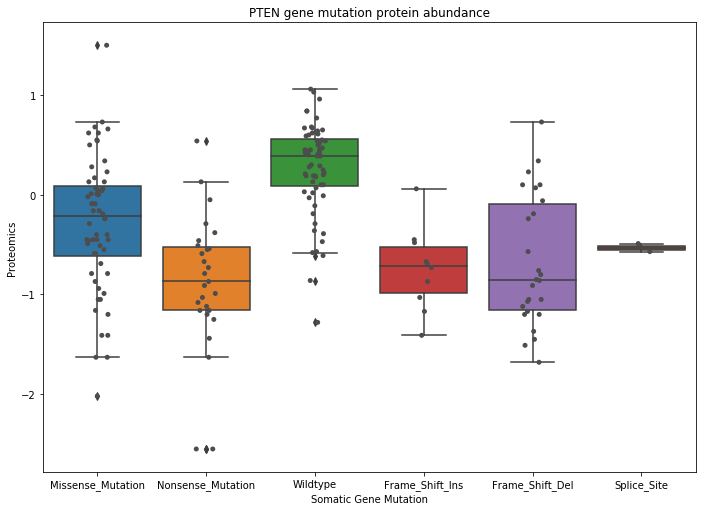

In [6]:
a4_dims = (11.7, 8.27) #dimensions for bigger plot
fig, ax = plt.subplots(figsize=a4_dims) #bigger plot displays Somatic Gene Mutation category without overlapping labels
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=gene, ax = ax)
somatic_boxplot.set_title("PTEN gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=gene,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

<b>We can now compare this plot to the plot of another gene (in this case, CTNNB1)</b>

In [7]:
gene2 = 'CTNNB1'
cross2 = CPTAC.compare_mutations(proteomics, 'CTNNB1')

<b>And plot it the same way</b>

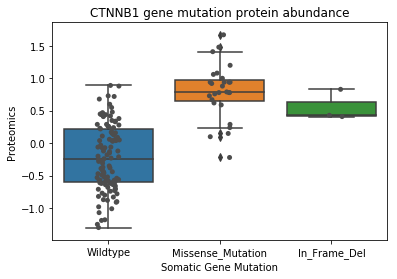

In [8]:
boxplot2 = sns.boxplot(data=cross2, x="Mutation",y=gene2)
boxplot2.set_title("CTNNB1 gene mutation protein abundance")
boxplot2 = sns.stripplot(data=cross2, x="Mutation",y=gene2,jitter=True, color=".3")
boxplot2.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()